In [ ]:
import os 
os.environ["HF_HOME"] = "/your/path/hf_cache"
from datasets import load_dataset 

    

In [2]:

eval_data = load_dataset('json', 
                         data_files="/your/path/visual7w/dataset.json", 
                         split="train")

In [3]:
from PIL import Image
idx = 0
# print(eval_data[idx].keys()) 
# # dict_keys(['images', 'version', 'dataset'])
# print(eval_data[idx]["images"].keys()) 
# dict_keys(['filename', 'image_id', 'qa_pairs', 'split'])
for qa_pair in eval_data[idx]["images"]['qa_pairs']:
    print(qa_pair['question'], qa_pair['answer'])

Where is he sitting? On a bench.
What is the man doing in the photo? Sitting.
What is on the ground between the man's legs? A backpack.
What direction is the man looking? Left.


In [4]:
count = 0
places = []
for item in eval_data:
    if item["images"]["split"] != 'val': continue
    for qa_pair in item["images"]["qa_pairs"]:
        if "Where" in qa_pair["question"] and "scene" in qa_pair["question"]:
            count += 1
            places.append(qa_pair["answer"])
print(places)


['The beach.', 'Outside a city.', 'Baseball game.', 'Oahu.', 'At the beach.', 'At a baseball field.', 'Outdoor eating area.', 'In a bathroom.', 'Train station.', 'At the zoo.', 'Tennis court.', 'On the street.', 'A bathroom.', 'Mountain.', 'Beach.', 'Beach shore.', 'On a safari.', 'On a grassland.', 'At an airport.', 'A parking lot.', 'At a skate park.', 'On the street.', 'A restaurant.', 'At dinner.', 'A dining room.', 'At a baseball park.', 'Tennis Court.', 'Park.', 'Ski slope.', 'On the beach.', 'Outside a building.', 'On the beach.', 'On the sidewalk.', 'Apple computers.', 'Downtown Toronto.', 'In a kitchen.', 'On the boardwalk.', 'Near a river.', 'By the ocean.', 'Airport.', 'On an air strip.', 'Beach.', 'At a baby shower.', 'A press conference.', 'Bathroom.', 'In an open field.', 'Nature.', 'In side building.', 'A farm.', 'City street.', 'Railroad tracks.', 'A backyard.', 'In a kitchen.', 'At a street.', 'The kitchen.', 'In a kitchen.', 'Inside a home.', 'Outside building.', 'The

In [10]:
import random

location_clusters = {
    "Beach/Ocean Environments": [
        "The beach", "At the beach", "Beach", "Beach shore", "On the beach", "On a beach",
        "By the ocean", "Near the ocean", "Ocean shore", "Beach scene", "On sand dune",
        "Oahu", "Inside a home very close to a marina and the sea", "Nature", "Outside a building",
        "Outside building", "Outdoor eating area", "Outside a city", "On the boardwalk"
    ],
    
    "Sports Facilities": [
        "Baseball game", "At a baseball field", "Tennis court", "At a baseball park",
        "Tennis Court", "Tennis court", "A tennis court", "At a baseball game",
        "On a baseball field", "A baseball field", "Soccer field", "Soccer field",
        "Sports arena", "Outside a building",
        "Outside building", "In the city", "In a city",
        "A town"
    ],
    
    "Kitchen/Dining Spaces": [
        "In a kitchen", "A restaurant", "At dinner", "A dining room", "In a kitchen",
        "The kitchen", "In a kitchen", "In a kitchen", "In a kitchen", "In a kitchen",
        "In a kitchen being remodeled in a home", "Kitchen", "A kitchen", "Kitchen",
        "In kitchen", "On a counter", "In a kitchen", "In a kitchen", "Bakery",
        "Near the food", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Bathroom Spaces": [
        "In a bathroom", "A bathroom", "Bathroom", "The bathroom", "In a bathroom",
        "Inside of a bathroom", "In a bathroom", "In a bathroom", "In a bathroom", 
        "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Urban Street Settings": [
        "On the street", "On the street", "City street", "At a street", "The street",
        "City street", "City street", "A city street", "A street", "Street", "Street",
        "Third street", "On street", "On the street", "Road", "Side of the road",
        "Outside a city", "On the sidewalk", "Broadway", "Downtown Toronto", "At an intersection", "Outside a building",
        "Outside building", "In the city", "In a city",
        "A town"
    ],
    
    "Natural Outdoor Settings": [
        "Mountain", "On a grassland", "In an open field", "Nature", "A farm",
        "Mountian", "Field", "Woods", "Yard", "Grassland", "Nature", "Outside a building",
        "Outside building", "Outdoor eating area", "Outside a city", "On the boardwalk"
    ],
    
    "Airport/Air Travel": [
        "At an airport", "Airport", "On an air strip", "Airport", "Airport",
        "Airport", "Airport runway", "In the sky", "Outside a building",
        "Outside building", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Zoo/Safari Settings": [
        "At the zoo", "In the zoo", "A zoo", "At a zoo", "In a zoo", "Zoo",
        "On a safari", "At a safari", "At a waterhole", "Nature", "Outside a building",
        "Outside building", "Outdoor eating area", "Outside a city", "In the city", "In a city",
        "A town"
    ],
    
    "Winter Sports Areas": [
        "Ski slope", "Ski slopes", "A ski lodge", "Ski slope", "Lodge", "Outside a building",
        "Outside building"
    ],
    
    "Train/Transportation Infrastructure": [
        "Train station", "Railroad tracks", "Station", "Train station", "Train station",
        "On a dock by the water", "Harbor", "On an air strip", "Airport runway", "Outside a building",
        "Outside building", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Indoor Home Spaces": [
        "Inside a home", "In a room", "Living Room", "IN a bedroom", 
        "A man on a phone in a room", "On a desk", "Table", "In a living room", 
        "Bedroom", "In a house", "Inside of a home", "In a building", "In a parlor",
        "Inside a refrigerator", "In a kitchen", "In a bathroom", "Indoores", 
        "Apple computers", "On a desk", "In front of a television", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Parking/Vehicle Areas": [
        "A parking lot", "In a parking lot", "Parking area", "In a car",
        "At the motorcycle Race", "Outside a building",
        "Outside building", "In the city", "In a city",
        "A town"
    ],
    
    "Parks/Recreational Outdoor Spaces": [
        "At a skate park", "Park", "At a park", "A Park", "Backyard patio", "A backyard",
        "Outdoor eating area", "Nature", "Field", "Yard", "Outside a building",
        "Outside building", "In the city", "In a city",
        "A town", "On the boardwalk"
    ],
    
    "Water Features": [
        "Near a river", "A river", "At the river", "On a dock by the water",
        "At a fountain", "Harbor", "By the ocean", "Near the ocean", "Ocean shore", "Nature", "Outside a building",
        "Outside building", "Outdoor eating area", "Outside a city", "In the city", "In a city",
        "A town", "On the boardwalk"
    ],
    
    "Urban Centers/Buildings": [
        "Outside a building", "Outside building", "Downtown Toronto", 
        "Inside a building", "In side building", "In the city", "In a city",
        "A town", "London", "Tokyo", "In front of clock tower",
        "This scene takes place on a road in front of a large building",
        "On the street", "City street", "Broadway"
    ],
    
    "Specialized Indoor Commercial Spaces": [
        "In a coffee shop", "Museum", "A tourist trap", "Farmers market", "At a market",
        "Bakery", "A restaurant", "In a coffee shop", "Outside a building",
        "Outside building", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Special Events/Gatherings": [
        "At a baby shower", "A press conference", "A birthday party", "An outdoor show",
        "At the concert photography session", "Performance", "Baseball game",
        "At a baseball game", "Outside a building",
        "Outside building", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Educational/Institutional Settings": [
        "In a classroom", "Museum", "A press conference", "Apple computers", "On a desk"
        , "In front of a television", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Tourist/Travel Destinations": [
        "Oahu", "A tourist trap", "London", "Tokyo", "Downtown Toronto",
        "Outside a city", "Beach", "Mountain", "On a safari", "Outside a building",
        "Outside building"
    ],
    
    "Technology Environments": [
        "Apple computers", "On a desk", "In front of a television", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ],
    
    "Construction/Maintenance Areas": [
        "At a construction site", "In a kitchen being remodeled in a home", "Outside a building",
        "Outside building", "Inside a building", "In side building", "In the city", "In a city",
        "A town"
    ]
}

# Function to find all clusters a location belongs to
def find_clusters_for_location(location, clusters_dict):
    found_in = []
    for cluster_name, locations in clusters_dict.items():
        if location in locations:
            found_in.append(cluster_name)
    return found_in

# Example usage:
test_location = "On the beach"
clusters = find_clusters_for_location(test_location, location_clusters)
print(f"'{test_location}' belongs to these clusters: {clusters}")

# Get all unique locations
all_locations = set()
for locations in location_clusters.values():
    all_locations.update(locations)

print(f"Total unique locations: {len(all_locations)}")

prepositions = ["at", "in", "on", "by", "near", "outside", "inside"]


'On the beach' belongs to these clusters: ['Beach/Ocean Environments']
Total unique locations: 148


In [17]:

paths_to_cluster = {}
for item in eval_data:
    if item["images"]["split"] != 'val': continue
    for qa_pair in item["images"]["qa_pairs"]:
        if "Where" in qa_pair["question"] and "scene" in qa_pair["question"]:
            ans = qa_pair["answer"].split(".")[0]
            
            paths_to_cluster[item["images"]["filename"]] = []
            for cluster in location_clusters:
                if ans in location_clusters[cluster]:
                    paths_to_cluster[item["images"]["filename"]].append(cluster)
            if len(paths_to_cluster[item["images"]["filename"]]) == 0:
                print(ans)
                input()


In [20]:
new_data = []
for item in eval_data:
    if item["images"]["split"] != 'val': continue
    for qa_pair in item["images"]["qa_pairs"]:
        if "Where" in qa_pair["question"] and "scene" in qa_pair["question"]:
            new_item = {}
            ans = qa_pair["answer"].split(".")[0].lower()
            if ans.split()[0] in prepositions:
                new_item['qry_text'] = f"Find me an everyday image that shows the scene {ans}.\n" # the scene of ...
            else:
                new_item['qry_text'] = f"Find me an everyday image that shows the scene of {ans}.\n" # the scene of ...
            new_item['qry_img_path'] = ''
            new_item['tgt_text'] = "<|image_1|> Represent the given image."
            new_item['tgt_img_path'] = [item["images"]["filename"]]
            current_clusters = paths_to_cluster[item["images"]["filename"]]
            all_paths = []
            for p in paths_to_cluster:
                if not set(paths_to_cluster[p]).intersection(current_clusters):
                    all_paths.append(p)
            if len(all_paths) < 99: print(ans)
            else: 
                new_item['tgt_img_path'].extend(random.sample(all_paths, 99))
                new_data.append(new_item)


outside a building
in side building
outside building
in the city
inside a building
a town
in a city


In [21]:

print(len(new_data))

172


In [22]:
import json

with open('Visual7W_scene_retrieval.json', 'w') as f:
    json.dump(new_data, f, indent=4)

In [23]:
# Test whether we can load it using load_dataset
new_eval_data = load_dataset('json', 
                      data_files='Visual7W_scene_retrieval.json',
                      split="train")

Generating train split: 172 examples [00:00, 9341.92 examples/s]


dict_keys(['qry_text', 'qry_img_path', 'tgt_text', 'tgt_img_path'])
Find me an everyday image that shows the scene of the beach.



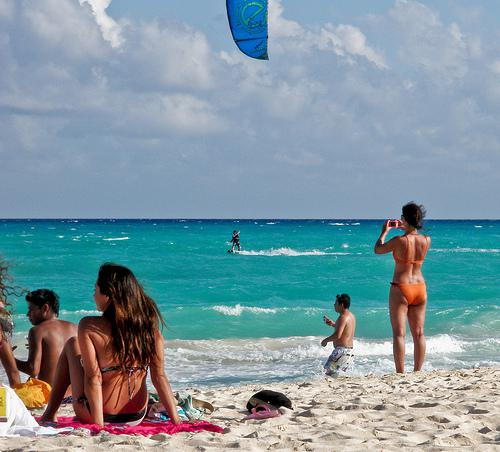

In [26]:
idx = 0
print(new_eval_data[idx].keys())
print(new_eval_data[idx]['qry_text'])
img = Image.open("/your/path/visual7w/images/"+new_eval_data[idx]['tgt_img_path'][0]).convert("RGB")
img